In [19]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.formula.api as smf
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)
from scipy.stats import t
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm

In [2]:
Auto = load_data('Auto')
print(Auto.columns)
Auto


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


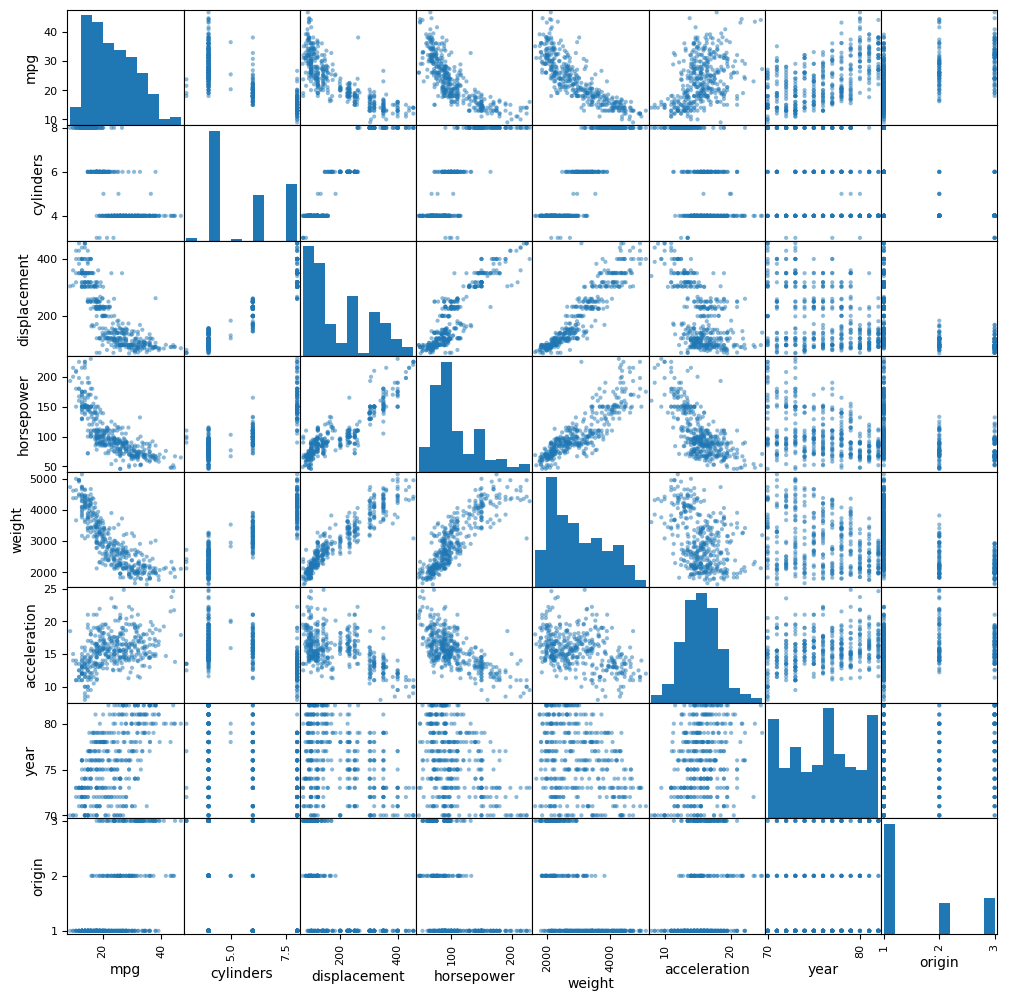

In [3]:
pd.plotting.scatter_matrix(Auto, figsize=(12,12));

In [4]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [5]:
y = Auto['mpg']
X = MS(Auto.columns.drop(['mpg'])).fit_transform(Auto)
model = sm.OLS(y, X)
results = model.fit()
print(summarize(results))
results.summary()

                 coef  std err       t  P>|t|
intercept    -17.2184    4.644  -3.707  0.000
cylinders     -0.4934    0.323  -1.526  0.128
displacement   0.0199    0.008   2.647  0.008
horsepower    -0.0170    0.014  -1.230  0.220
weight        -0.0065    0.001  -9.929  0.000
acceleration   0.0806    0.099   0.815  0.415
year           0.7508    0.051  14.729  0.000
origin         1.4261    0.278   5.127  0.000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 29 Jun 2024   Prob (F-statistic):          2.04e-139
Time:                        11:14:46   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
import statsmodels.formula.api as smf

results1 = smf.ols('y~X',data=Auto).fit()
anova_lm(results1)

,df,sum_sq,mean_sq,F,PR(>F)
X,8.0,19575.989106,2446.998638,220.978484,1.327873e-138
Residual,384.0,4252.212530,11.073470,NaN,NaN


Displacement, weight, year and origin appear to have a statistically significant relationship to the response

The coefficient of the year variable of 0.7508 suggests that with all other vairables held constant, a increase of 1 of one year will lead to an increase of 0.7508 mpg. This means that as time goes on mpg tends to get better.

In [14]:
results.params

intercept      -17.218435
cylinders       -0.493376
displacement     0.019896
horsepower      -0.016951
weight          -0.006474
acceleration     0.080576
year             0.750773
origin           1.426140
dtype: float64

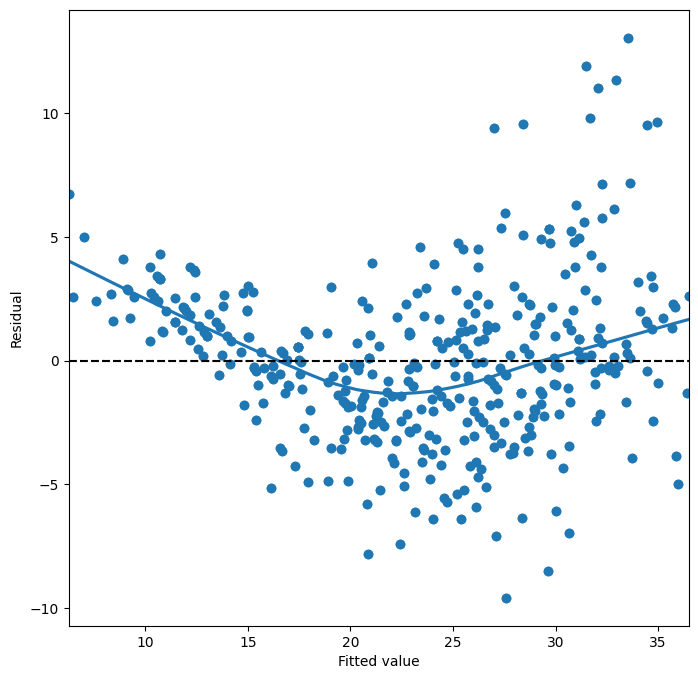

In [21]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
sns.residplot(data=Auto, x=results.fittedvalues, y='mpg', lowess=True)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

In [ ]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat